In [46]:
# Libraries 
import numpy as np 
import pandas as pd 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
import matplotlib.pyplot as plt

In [7]:
main_path = 'course-material-time-series-forecasting-product'
nyc_data = main_path+str("/nyc_data.csv")
print(nyc_data)

course-material-time-series-forecasting-product/nyc_data.csv


In [10]:
# Best practice when dealing with Time series: Date variable goes to index
# To do so, inform 'index_col='
# To write the time in a 'standard format', which is YYYY-MM-DD, inform 'parse_dates='
# This df is very big. To only show a small snipped, inform 'df.head()'
df = pd.read_csv(nyc_data, index_col=0, parse_dates=True)
df.head() 

,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305
2015-01-02,581.276773,0,0,0,4.73,131.574
2015-01-03,754.117039,0,0,0,7.23,162.700
2015-01-04,622.252774,0,0,0,10.96,160.281
2015-01-05,785.373319,0,0,0,6.92,51.077


In [11]:
# Rename variable 
# Let's rename the dependent variable. 
# (Which is the one that we want to predict)
df = df.rename(columns={'Demand': 'y'})
df.head()

,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2015-01-01,720.000885,0,0,0,3.68,41.305
2015-01-02,581.276773,0,0,0,4.73,131.574
2015-01-03,754.117039,0,0,0,7.23,162.700
2015-01-04,622.252774,0,0,0,10.96,160.281
2015-01-05,785.373319,0,0,0,6.92,51.077


# Data Analysis

In [13]:
#Summary Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
y,2192.0,756.059227,152.143070,425.77532,641.161123,736.94763,855.645886,1384.908525
Easter,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Thanksgiving,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Christmas,2192.0,0.002737,0.052259,0.00000,0.000000,0.00000,0.000000,1.000000
Temperature,2192.0,15.012655,8.772751,-8.85000,7.767500,14.89500,23.230000,30.900000
Marketing,2192.0,126.675890,58.274047,24.58900,78.303500,122.76450,169.395250,299.860000


# Seasonal decomposition

## Multiplicative 

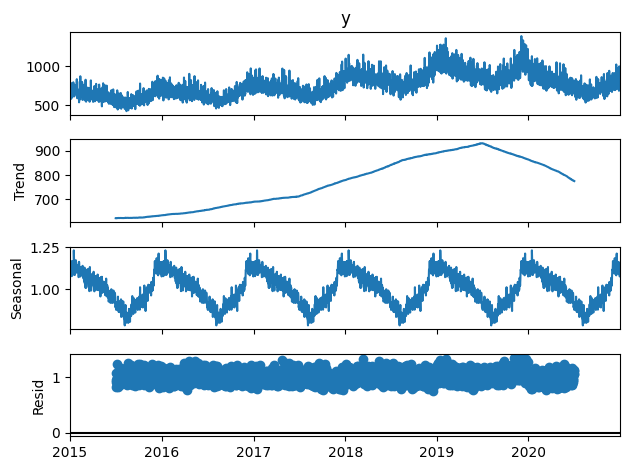

In [27]:
#decomposition 
# x = df.y (Time Series), model='multiplicative' (model type), period='365' (1 year = 365 days)
# Observed: y -> It is our time series 
# Trend:  growing and decreasing at the end 
# Seasonal:  cicles - Max of the season fluctuation is 1.25 
# Residual: (+25% to 1.25%) pretty high error -> cannot be explained by seasonal nor the trend. 

decomposition = seasonal_decompose(x = df.y, model='multiplicative', period=365);
decomposition.plot();

<Axes: xlabel='Date'>

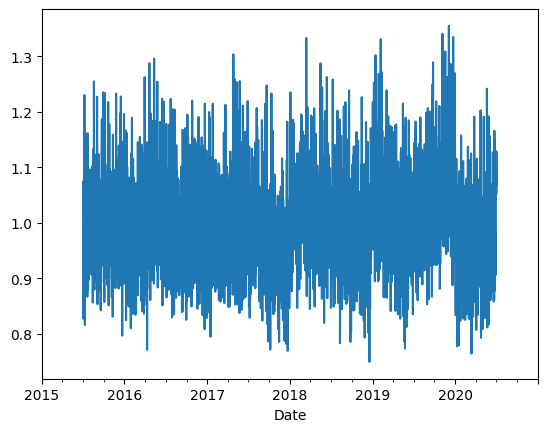

In [28]:
# Individual plotting (e.g., for Residual)
# At the end (2020), the error are no long growing, it is the opposite instead. 
# In another words, the error are more inclined to lower y-axis. (it means that it is maybe underepresenting the time series)
decomposition.resid.plot()

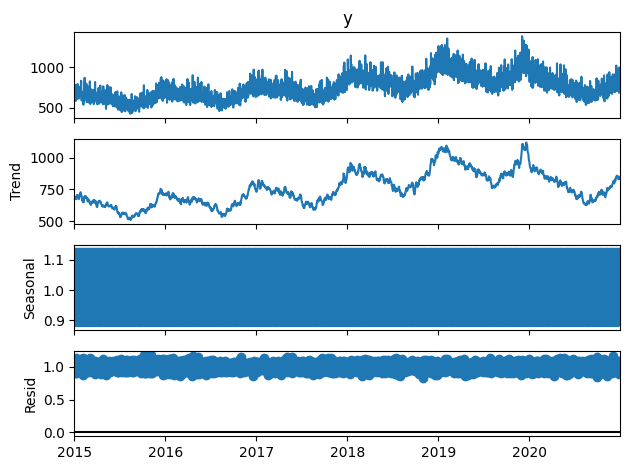

In [25]:
#decomposition 
# Be careful with the period resolution depending on how your data is being shown. 
# Have a weekly resolution (7 days) may show a lot of variations, instead a better resolution for this problem would be yearly resolution
# A high resolution (7days) may hide the pattern found in a longer term (yearly) resolution (due to several/random of trends)
decomposition = seasonal_decompose(x = df.y, model='multiplicative', period=7);
decomposition.plot();

## Additive

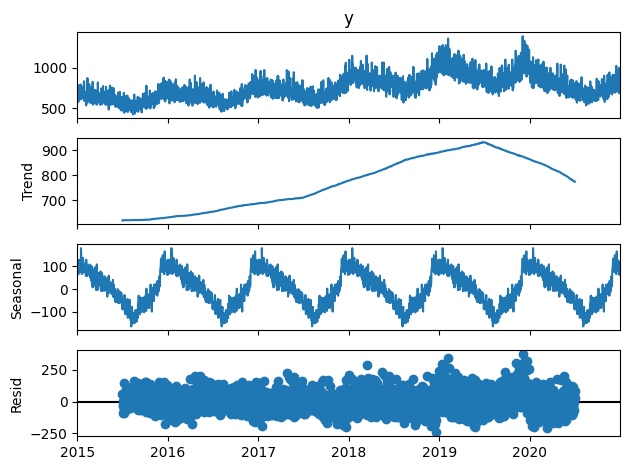

In [26]:
#decomposition 
# The trend remains the same 
# The seasonal and residual now are added, i.e., y=t+s+e, where absule values are added. 
decomposition = seasonal_decompose(x = df.y, model='additive', period=365);
decomposition.plot();

In [31]:
# Seasonal graphs
# Seasonal plot of monthly data

# We have daily data. 
# We need to transform our daily data to montly data. 

# It creates an object. (QE - means quarter, W - means week, M- means month, MS - month starts)
df.y.resample(rule = 'MS')

# Create it usingn the mean and we pass it to the function of the next cell
df.y.resample(rule = 'MS').mean()

Date
2015-01-01    692.967611
2015-02-01    676.381042
2015-03-01    646.326069
2015-04-01    636.463333
2015-05-01    621.211624
                 ...    
2020-08-01    642.785119
2020-09-01    673.093698
2020-10-01    719.514838
2020-11-01    745.599826
2020-12-01    832.963040
Freq: MS, Name: y, Length: 72, dtype: float64

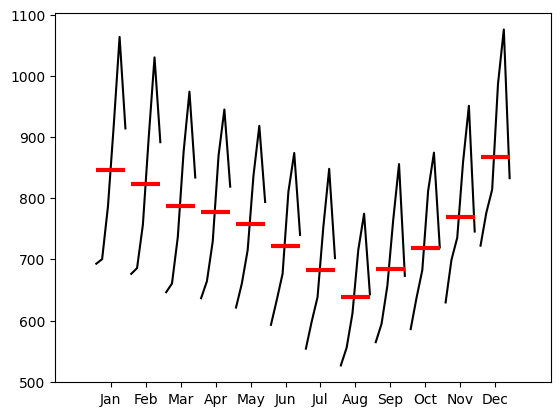

In [34]:
# We have a specific seasonality
# In general it is higher during the colder months, 
# Each reaches the bottom in August, where it starts to increase once more
# The black lines represents the Trends of the months.  
# One can read the black lines like 'Jan over the years'. 'Feb over the years'. 'Mar over the years' ... 
month_plot(df.y.resample(rule = 'MS').mean());

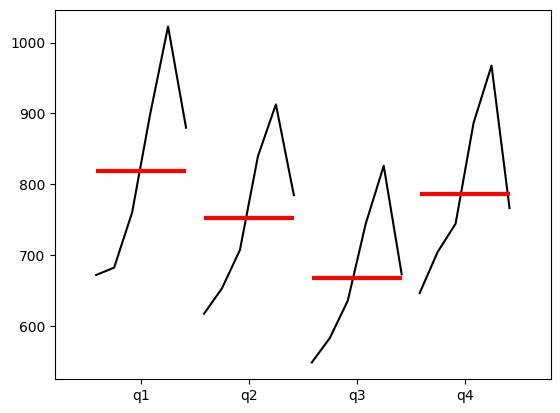

In [40]:
# Let's see the same thing but for the quarter
# Notice that the red line still shows the trend shown when the analysis was done for each month
quarter_plot(df.y.resample(rule = 'QE').mean());

# Advanced Visualization

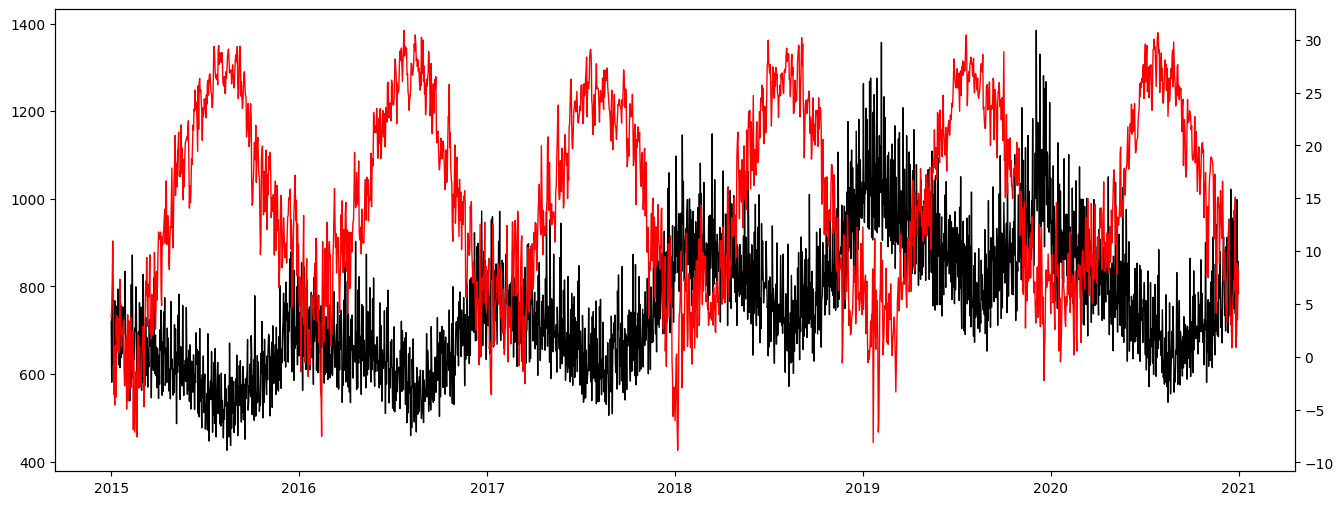

In [49]:
# Create a versionn B of the dataframe 
df_plot = df 

# Define the colors
temp_color = 'red'
y_color = 'black'

fig, ax1 = plt.subplots(figsize=(16,6));
ax2 = ax1.twinx() # So it knows it is two graphs

# Data and Lines
ax1.plot(df_plot.index, df_plot.y, color=y_color, lw=1)
ax2.plot(df_plot.index, df_plot.Temperature, color=temp_color, lw=1)